## Merge

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import both dfs
##set a working directory
user = os.path.expanduser('~')
display(user)

os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/')

data_conflict = pd.read_csv('df_conflict.csv')
data_DALY = pd.read_csv('df_DALY_SSA.csv')

'/Users/NatStrom'

In [3]:
data_conflict.dtypes

Unnamed: 0                 int64
c_id                       int64
year                       int64
type_of_violence          object
best                       int64
high                       int64
low                        int64
dummy_sb                   int64
dummy_ns                   int64
dummy_os                   int64
intensity                 object
dummy_low_intensity        int64
dummy_medium_intensity     int64
dummy_high_intensity       int64
dtype: object

In [4]:
data_DALY.dtypes

Unnamed: 0       int64
measure_name    object
country         object
sex             object
age             object
rei_id           int64
cause_name      object
cause_id         int64
rei_name        object
year             int64
daly_mean        int64
daly_upper       int64
daly_lower       int64
region_SSA      object
iso             object
dtype: object

In [5]:
data_DALY = data_DALY.rename(columns= {'year':'year_id'})
data_conflict = data_conflict.rename(columns= {'year':'year_id'})

In [6]:
from ingester3.scratch import cache_manager

cache_manager()

# This will import the Pandas extensions as well as bootstrap the object layer
from ingester3.extensions import *

In [14]:
data_DALY = pd.DataFrame.cy.soft_validate_iso_year(data_DALY, iso_col='iso', year_col = 'year_id', at_month = 12)
inspect = data_DALY.query("valid_id == False")
print('countries with invalid id below')
display(inspect)
print(list(inspect.country.unique()))



data_DALY = pd.DataFrame.cy.from_iso_year(data_DALY[data_DALY['valid_id']==True], iso_col = 'iso', year_col = 'year_id', at_month = 12)
data_DALY = data_DALY.c.db_id()

countries with invalid id below


,Unnamed: 0,measure_name,country,sex,age,rei_id,cause_name,cause_id,rei_name,year_id,daly_mean,daly_upper,daly_lower,region_SSA,iso,valid_id
47,15115,DALYs (Disability-Adjusted Life Years),South Sudan,btsx,All ages,83,All causes,294,Unsafe water source,1990,6608,11598,3999,SSA_east,SSD,False
48,15116,DALYs (Disability-Adjusted Life Years),South Sudan,btsx,All ages,84,All causes,294,Unsafe sanitation,1990,4989,8850,3110,SSA_east,SSD,False
49,15123,DALYs (Disability-Adjusted Life Years),South Sudan,btsx,All ages,238,All causes,294,No access to handwashing facility,1990,5795,8584,3601,SSA_east,SSD,False
50,15263,DALYs (Disability-Adjusted Life Years),South Sudan,btsx,All ages,83,"Communicable, maternal, neonatal, and nutritio...",295,Unsafe water source,1990,6608,11598,3999,SSA_east,SSD,False
51,15264,DALYs (Disability-Adjusted Life Years),South Sudan,btsx,All ages,84,"Communicable, maternal, neonatal, and nutritio...",295,Unsafe sanitation,1990,4989,8850,3110,SSA_east,SSD,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,486110,DALYs (Disability-Adjusted Life Years),Sub-Saharan Africa,btsx,All ages,84,All causes,294,Unsafe sanitation,2008,4695,5657,3776,SSA_middle,NaN,False
19710,486117,DALYs (Disability-Adjusted Life Years),Sub-Saharan Africa,btsx,All ages,238,All causes,294,No access to handwashing facility,2008,3841,4928,2753,SSA_middle,NaN,False
19714,487917,DALYs (Disability-Adjusted Life Years),Sub-Saharan Africa,btsx,All ages,83,"Communicable, maternal, neonatal, and nutritio...",295,Unsafe water source,2008,6363,7797,4853,SSA_middle,NaN,False
19715,487918,DALYs (Disability-Adjusted Life Years),Sub-Saharan Africa,btsx,All ages,84,"Communicable, maternal, neonatal, and nutritio...",295,Unsafe sanitation,2008,4695,5657,3776,SSA_middle,NaN,False


['South Sudan', 'Sub-Saharan Africa', 'Democratic Republic of the Congo', 'Eritrea', 'United Republic of Tanzania']


In [19]:
#find out which countries it has thrown out
test = data_DALY.loc[data_DALY['iso'] == 'COD']
test = data_DALY.loc[data_DALY['iso'] == 'TZA']
test

,Unnamed: 0,measure_name,country,sex,age,rei_id,cause_name,cause_id,rei_name,year_id,daly_mean,daly_upper,daly_lower,region_SSA,iso,valid_id,c_id


In [8]:
data_DALY = data_DALY.pivot_table(index=['c_id','year_id'],columns=['cause_name','rei_name','sex','age'],values=['daly_mean'],  aggfunc= 'sum')

data_DALY.assign(**data_DALY.index.to_frame()) #need to do this if the data is multihierarchical

data_DALY.columns = ['_'.join(col) for col in data_DALY.columns]
data_DALY=data_DALY.reset_index()
data_DALY

,c_id,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages,daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages,daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages,daly_mean_Enteric infections_Unsafe water source_btsx_All ages,daly_mean_Lower respiratory infections_No access to handwashing facility_btsx_All ages,daly_mean_Respiratory infections and tuberculosis_No access to handwashing facility_btsx_All ages
0,40,1990,2608,3971,5340,2608,3971,5340,1978,3971,5340,1978,3971,5340,629,629
1,40,1991,2416,3637,4896,2416,3637,4896,1812,3637,4896,1812,3637,4896,603,603
2,40,1992,2274,3360,4527,2274,3360,4527,1675,3360,4527,1675,3360,4527,598,598
3,40,1993,2132,3040,4097,2132,3040,4097,1516,3040,4097,1516,3040,4097,615,615
4,40,1994,2203,3135,4230,2203,3135,4230,1565,3135,4230,1565,3135,4230,638,638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,246,2015,3702,3883,5107,3702,3883,5107,1940,3883,5107,1940,3883,5107,1761,1761
1292,246,2016,3605,3810,5011,3605,3810,5011,1904,3810,5011,1904,3810,5011,1700,1700
1293,246,2017,3327,3587,4720,3327,3587,4720,1793,3587,4720,1793,3587,4720,1533,1533
1294,246,2018,3114,3393,4467,3114,3393,4467,1697,3393,4467,1697,3393,4467,1416,1416


## Merge

In [9]:
data_DALY

,c_id,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages,daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages,daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages,daly_mean_Enteric infections_Unsafe water source_btsx_All ages,daly_mean_Lower respiratory infections_No access to handwashing facility_btsx_All ages,daly_mean_Respiratory infections and tuberculosis_No access to handwashing facility_btsx_All ages
0,40,1990,2608,3971,5340,2608,3971,5340,1978,3971,5340,1978,3971,5340,629,629
1,40,1991,2416,3637,4896,2416,3637,4896,1812,3637,4896,1812,3637,4896,603,603
2,40,1992,2274,3360,4527,2274,3360,4527,1675,3360,4527,1675,3360,4527,598,598
3,40,1993,2132,3040,4097,2132,3040,4097,1516,3040,4097,1516,3040,4097,615,615
4,40,1994,2203,3135,4230,2203,3135,4230,1565,3135,4230,1565,3135,4230,638,638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,246,2015,3702,3883,5107,3702,3883,5107,1940,3883,5107,1940,3883,5107,1761,1761
1292,246,2016,3605,3810,5011,3605,3810,5011,1904,3810,5011,1904,3810,5011,1700,1700
1293,246,2017,3327,3587,4720,3327,3587,4720,1793,3587,4720,1793,3587,4720,1533,1533
1294,246,2018,3114,3393,4467,3114,3393,4467,1697,3393,4467,1697,3393,4467,1416,1416


In [10]:
list(data_DALY.c_id.unique())

[40,
 41,
 42,
 43,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 69,
 70,
 74,
 76,
 78,
 79,
 80,
 81,
 120,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 169,
 170,
 172,
 191,
 214,
 235,
 237,
 244,
 246]

In [13]:
#import the control variables
data_dah = pd.read_csv('control variables/data_dah.csv')
data_wdi = pd.read_csv('control variables/data_wdi.csv')
data_vn = pd.read_csv('control variables/data_vn.csv')
data_disaster = pd.read_csv('control variables/data_disaster.csv')
data_wash = pd.read_csv('control variables/data_wash.csv')
data_uhc = pd.read_csv('control variables/data_uhc.csv')

In [28]:
#merge the datasets on c_id and year
data_merged = pd.merge(data_DALY, data_conflict, how="outer", on=["c_id", "year_id"])

In [29]:
data_merged = pd.merge(pd.merge(data_merged,data_dah,on=["c_id", "year_id"]),data_wdi,on=["c_id", "year_id"])
data_merged = pd.merge(pd.merge(data_merged,data_vn,on=["c_id", "year_id"]),data_disaster,on=["c_id", "year_id"])
data_merged = pd.merge(pd.merge(data_merged,data_wash,on=["c_id", "year_id"]),data_uhc,on=["c_id", "year_id"])

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_19177/2680674308.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_merged = pd.merge(pd.merge(data_merged,data_vn,on=["c_id", "year_id"]),data_disaster,on=["c_id", "year_id"])
/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_19177/2680674308.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_merged = pd.merge(pd.merge(data_merged,data_wash,on=["c_id", "year_id"]),data_uhc,on=["c_id", "year_id"])


In [30]:
list(data_merged.columns)

['c_id',
 'year_id',
 'daly_mean_All causes_No access to handwashing facility_btsx_All ages',
 'daly_mean_All causes_Unsafe sanitation_btsx_All ages',
 'daly_mean_All causes_Unsafe water source_btsx_All ages',
 'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages',
 'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages',
 'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages',
 'daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages',
 'daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages',
 'daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages',
 'daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages',
 'daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages',
 'daly_mean_Enteric infections_Unsafe water source_btsx_All ages',
 'daly_mean_Lower respiratory i

In [34]:
SSA_list = list(list(data_DALY['c_id'].drop_duplicates()))
print(SSA_list)

[40, 41, 42, 43, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 69, 70, 74, 76, 78, 79, 80, 81, 120, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 169, 170, 172, 191, 214, 235, 237, 244, 246]


In [33]:
data_merged = data_merged.drop(columns={'Unnamed: 0.1','Unnamed: 0_y','country','iso_x','valid_id_x','valid_id_y','Unnamed: 0_y',
                                        'Unnamed: 0_x','Unnamed: 0_y','valid_id','Unnamed: 0','iso_y'})

In [36]:
data_merged = data_merged.loc[data_merged['c_id'].isin([40, 41, 42, 43, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 69, 70, 74, 76, 78, 79, 80, 81, 120, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 169, 170, 172, 191, 214, 235, 237, 244, 246])]

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_19177/1356186515.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_final = data_merged.groupby(['c_id','year_id']).sum().reset_index()


AttributeError: 'DataFrame' object has no attribute 'show_all'

In [43]:
data_final = data_merged.copy()

In [44]:
data_final['daly_all'] = data_final['daly_mean_All causes_No access to handwashing facility_btsx_All ages'] + data_final['daly_mean_All causes_Unsafe sanitation_btsx_All ages'] + data_final['daly_mean_All causes_Unsafe water source_btsx_All ages']
data_final['daly_respirat'] = data_final['daly_mean_Respiratory infections and tuberculosis_No access to handwashing facility_btsx_All ages'] + data_final['daly_mean_Lower respiratory infections_No access to handwashing facility_btsx_All ages']
data_final['daly_enteric'] = data_final['daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages']+data_final['daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages']+data_final['daly_mean_Enteric infections_Unsafe water source_btsx_All ages']
data_final['daly_diarrheal'] = data_final['daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages']+data_final['daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages']+data_final['daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages']
data_final['daly_cmnn'] = data_final['daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages']+data_final['daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages']+data_final['daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages']

# descriptives

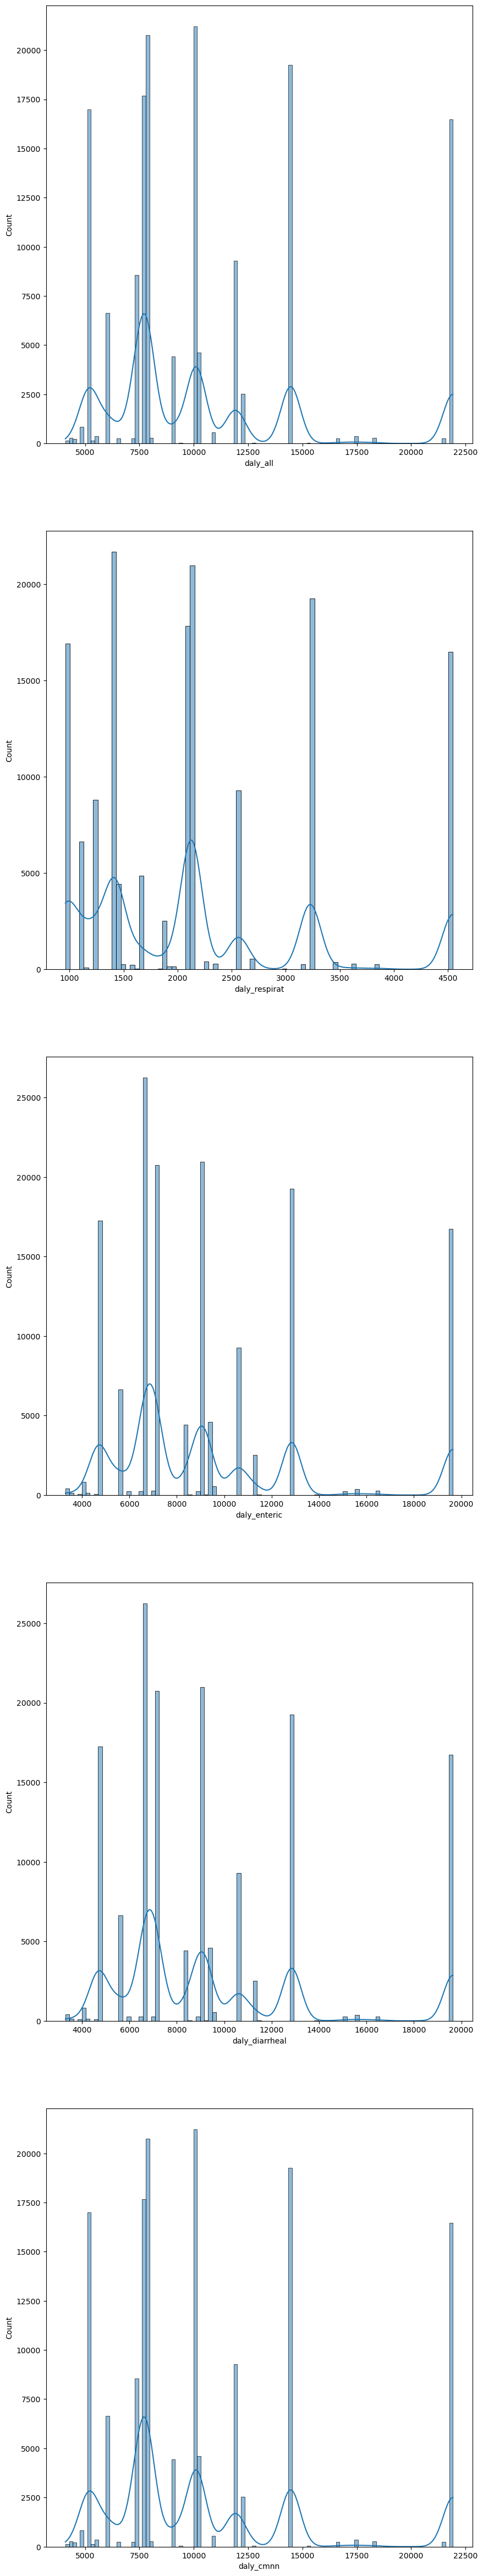

In [45]:
plot =figure, axes = plt.subplots(5,1,figsize=(10,60))
sns.histplot(data_final['daly_all'],kde = True,ax=axes[0])
sns.histplot(data_final['daly_respirat'],kde = True,ax=axes[1])
sns.histplot(data_final['daly_enteric'],kde = True,ax=axes[2])
sns.histplot(data_final['daly_diarrheal'],kde = True,ax=axes[3])
sns.histplot(data_final['daly_cmnn'],kde = True,ax=axes[4])

plt.savefig('daly1c.png')

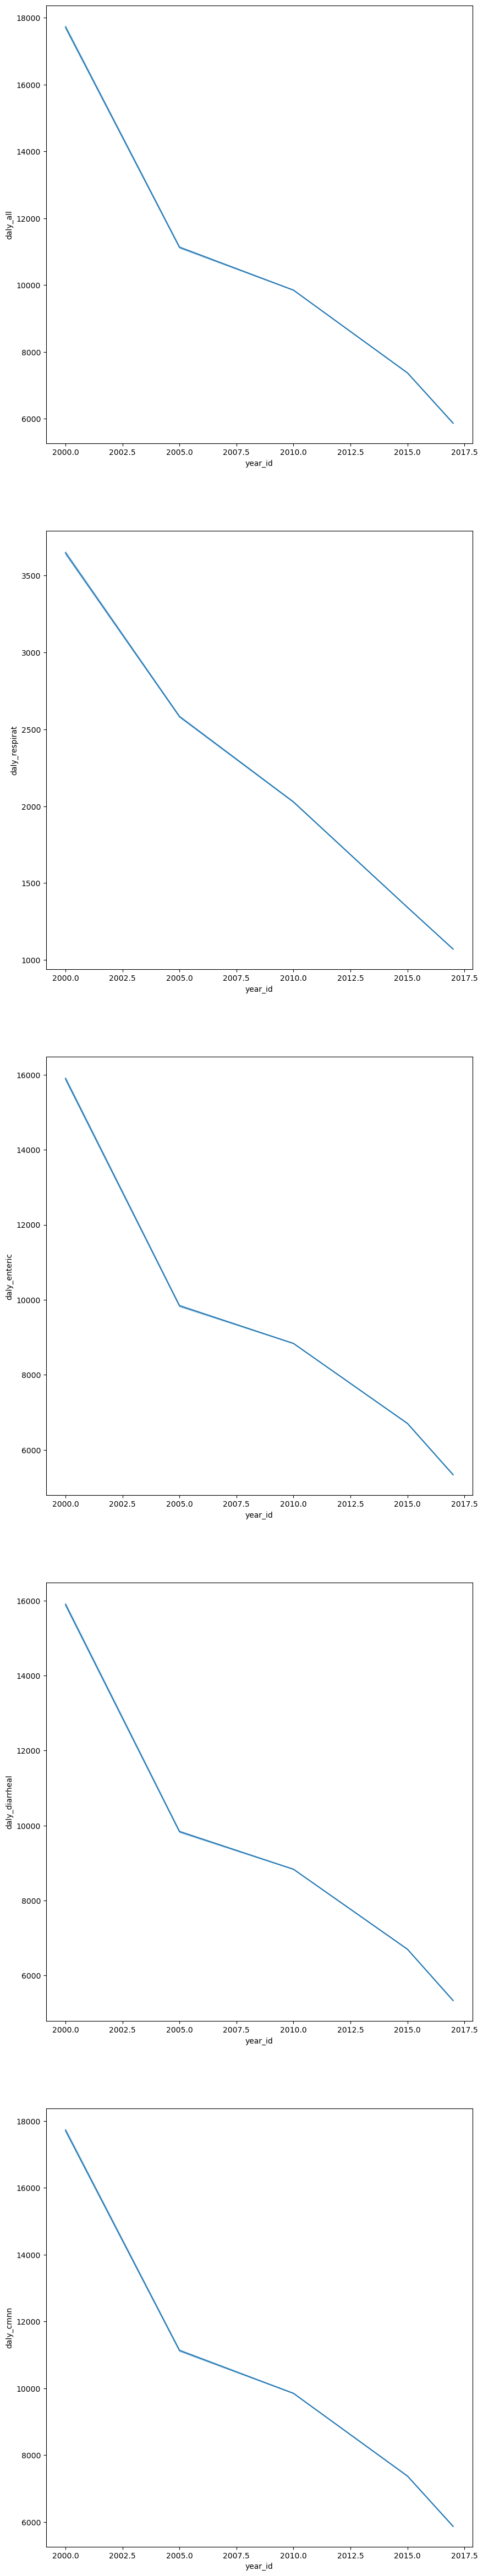

In [46]:

figure, axes = plt.subplots(5,1,figsize=(10,60))
sns.lineplot(x= 'year_id',y='daly_all',data=data_final,ax=axes[0])
sns.lineplot(x= 'year_id',y='daly_respirat',data=data_final,ax=axes[1])
sns.lineplot(x= 'year_id',y='daly_enteric',data=data_final,ax=axes[2])
sns.lineplot(x= 'year_id',y='daly_diarrheal',data=data_final,ax=axes[3])
sns.lineplot(x= 'year_id',y='daly_cmnn',data=data_final,ax=axes[4])

plt.savefig('daly2.png')

In [48]:
data_final['dummy_sb'].describe()

count    150780.00000
mean          0.51792
std           0.49968
min           0.00000
25%           0.00000
50%           1.00000
75%           1.00000
max           1.00000
Name: dummy_sb, dtype: float64

In [49]:
data_final.to_csv('data_final.csv')